In [49]:
import pandas as pd

# Data Sources

In [50]:
csv = "Combined_Hosp_Drug_Util_v2.csv"
csv2 = "C:/Users/pedro/Downloads/Public_Table11.csv"


df = pd.read_csv(csv)
df.head(1)

,Unnamed: 0,Zip,County,State,Year,Total Pop,Male Pop,Pct Male,Female Pop,Pct Female,...,"AS per 1,000","ED per 1,000","IP per 1,000","IP via ED per 1,000","C2 per 1,000","C3 per 1,000","C4 per 1,000","C2-C4 per 1,000","Opioid Rx per 1,000","Pop w Opioid Rx per 1,000"
0,0,90001,Los Angeles,CA,2016,57942,29520,50.9,28422,49.1,...,31.031031,423.768596,62.614338,56.711884,14.549032,3.468986,29.512271,47.530289,135.980808,72.520797


## 2016 Prescribed Scheduled Drugs (Southern California)

In [51]:
#Scheduled Drugs PER 1,000 by County 

drugs = df[df.Year == 2016]
drugs = df.groupby("County", as_index=True)["C2 per 1,000","C3 per 1,000","C4 per 1,000"].sum()
drugs = round(drugs)
drugs = drugs.rename(columns={"C2 per 1,000":"Schedule 2", "C3 per 1,000":"Schedule 3",
                              "C4 per 1,000":"Schedule 4"})
drugs.head(1)

,Schedule 2,Schedule 3,Schedule 4
County,,,
Alameda,15793.0,2046.0,11715.0


In [52]:
#Southern California Prescribed Scheduled Drugs

drugs_socal = drugs.loc[("Imperial","Kern","Los Angeles","Orange","Riverside","San Bernardino",
                "San Diego","San Luis Obispo","Santa Barbara",
                "Ventura"),:]

drugs_socal

,Schedule 2,Schedule 3,Schedule 4
County,,,
Imperial,987.0,171.0,1310.0
Kern,14489.0,2242.0,15734.0
Los Angeles,91936.0,20379.0,122860.0
Orange,32296.0,6026.0,34793.0
Riverside,27248.0,4555.0,27988.0
San Bernardino,19770.0,3307.0,19969.0
San Diego,37534.0,6201.0,33676.0
San Luis Obispo,6011.0,1424.0,7937.0
Santa Barbara,7055.0,1293.0,9070.0


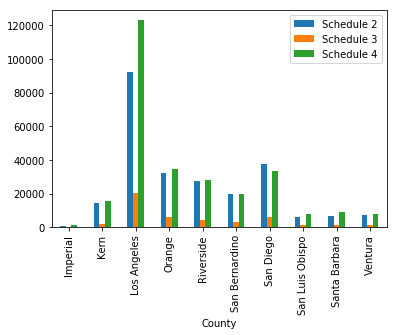

In [53]:
#NUMBER OF PATIENTS WITH PRESCRIBED SCHEDULED DRUGS (BY COUNTY IN SOUTHERN CALIFORNIA)

drugs_socal.plot(kind="bar")

## 2016 Prescription Volume vs ER Volume

In [54]:
df.head(1)

,Unnamed: 0,Zip,County,State,Year,Total Pop,Male Pop,Pct Male,Female Pop,Pct Female,...,"AS per 1,000","ED per 1,000","IP per 1,000","IP via ED per 1,000","C2 per 1,000","C3 per 1,000","C4 per 1,000","C2-C4 per 1,000","Opioid Rx per 1,000","Pop w Opioid Rx per 1,000"
0,0,90001,Los Angeles,CA,2016,57942,29520,50.9,28422,49.1,...,31.031031,423.768596,62.614338,56.711884,14.549032,3.468986,29.512271,47.530289,135.980808,72.520797


In [55]:
prescription = df[df["Year"]==2016]
prescription = df.groupby("County")[["ED per 1,000","C2-C4 per 1,000"]].sum()
prescription = round(prescription)
prescription.head(1)

,"ED per 1,000","C2-C4 per 1,000"
County,,
Alameda,13192.0,29554.0


In [56]:
#Southern California - ER Volume & Scheduled Drugs Volume per 1,000

prescription_socal = prescription.loc[("Imperial","Kern","Los Angeles","Orange","Riverside","San Bernardino",
                "San Diego","San Luis Obispo","Santa Barbara",
                "Ventura"),:]

prescription_socal

,"ED per 1,000","C2-C4 per 1,000"
County,,
Imperial,4893.0,2412.0
Kern,16401.0,32464.0
Los Angeles,77267.0,235176.0
Orange,19162.0,73114.0
Riverside,22692.0,59792.0
San Bernardino,36267.0,43045.0
San Diego,24645.0,77412.0
San Luis Obispo,6219.0,15372.0
Santa Barbara,6051.0,17418.0


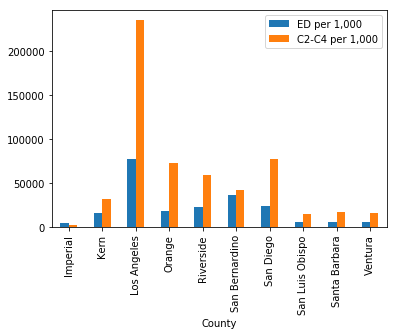

In [57]:
prescription_socal.plot(kind="bar")

## 2016 Rx Count by Age Group (All California)

In [62]:
#2016 RxCount by Age Group

age = pd.read_csv(csv2)
age = age.drop(columns={"State","rundatetime","PillCount","MeanPill_byRx"})
age = age[age["xYear"] == 2016]
age.head(2)

,xYear,Schedule_Group,Age_Group,RxCount
15,2016,2,15-24 yrs,817743
16,2016,2,25-44 yrs,2960620


In [63]:
age_grouped = age.pivot_table(index="Age_Group", columns = "Schedule_Group", values = "RxCount", aggfunc = sum)
age_grouped

Schedule_Group,2,3,4
Age_Group,,,
15-24 yrs,817743,108993,369556
25-44 yrs,2960620,394618,2836102
45-64 yrs,5273204,537798,5910148
=< 14 yrs,546320,15753,139634
>= 65 yrs,3299667,360730,4157589


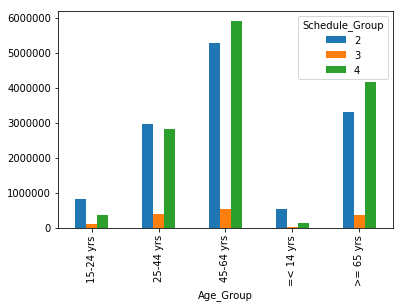

In [65]:
age_grouped.plot(kind="bar")